In [42]:
import skimage
from skimage import io, util, filters

In [47]:
from skimage.measure import label
from skimage import morphology as mo
from skimage.color import label2rgb


In [7]:
mac=io.imread('macarronada.jpg')

In [21]:
from matplotlib import pyplot as plt
import numpy as np

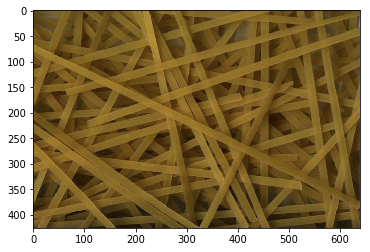

In [10]:
plt.imshow(mac)
plt.show()

In [12]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.filters import sobel

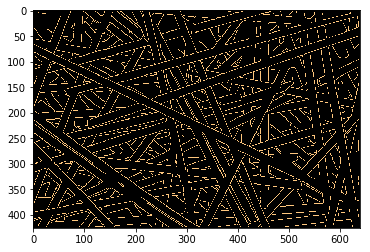

In [33]:
edges = canny(mac[:,:,1])
plt.imshow(edges,'copper')
plt.show()

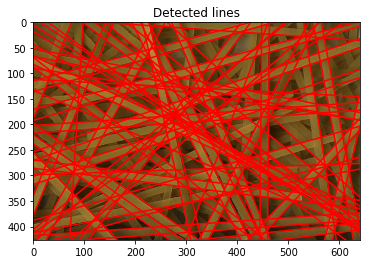

In [40]:
h, theta, d = hough_line(edges)
plt.imshow(mac)
ax=plt.gca()
for _, angle, dist in zip(*hough_line_peaks(h, theta, d,threshold=90)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - mac.shape[1] * np.cos(angle)) / np.sin(angle)
    plt.plot((0, mac.shape[1]), (y0, y1), '-r')
ax.set_xlim((0, mac.shape[1]))
ax.set_ylim((mac.shape[0], 0))
#ax.set_axis_off()
ax.set_title('Detected lines')
plt.show()


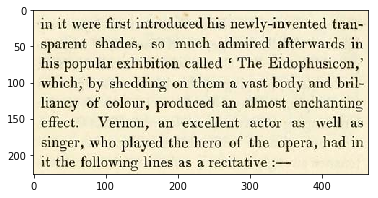

In [41]:
text=io.imread('text.png')
plt.imshow(text)
plt.show()

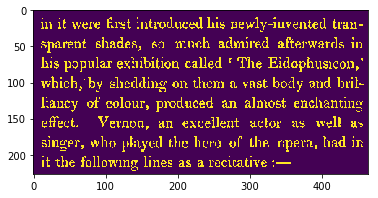

In [53]:
bin_text=text[:,:,1]<filters.threshold_otsu(text[:,:,1])
plt.imshow(bin_text)
plt.show()

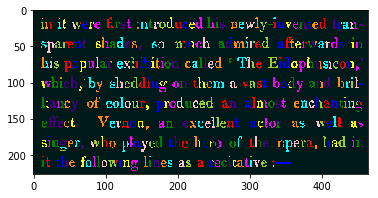

In [66]:
labeled=label(bin_text)
plt.imshow(label2rgb(labeled,bg_label=0,bg_color=[0.0,0.1,0.1]))
plt.show()

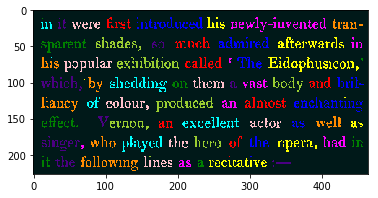

In [82]:
plt.imshow(label2rgb(bin_text*label(mo.binary_dilation(bin_text,mo.square(4))),
                     bg_label=0,bg_color=[0.0,0.1,0.1]));
plt.show()

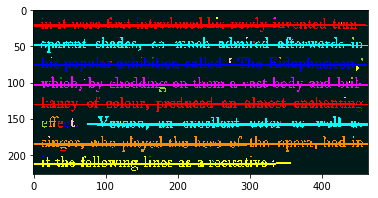

In [105]:
dilated=mo.binary_dilation(bin_text,mo.rectangle(1,40))
resp1=mo.binary_erosion(dilated,mo.rectangle(8,1))
resp=mo.binary_opening(resp1,mo.rectangle(1,200))
resp[bin_text]=1
plt.imshow(label2rgb(label(resp),bg_label=0,bg_color=[0.0,0.1,0.1]));
plt.show()